In [1]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import pprint
import gzip
import matplotlib.pyplot as plt
import nrrd
import skimage 
import SimpleITK as sitk

In [2]:
os.chdir("/home/mchopra/Documents/PhD-Year1/segmentation_test/patient_3_1092403/")

In [3]:
!dcm2niix -ba y -b y /home/mchopra/Documents/PhD-Year1/segmentation_test/patient_3_1092403/

Chris Rorden's dcm2niiX version v1.0.20220505  GCC11.3.0 x86-64 (64-bit Linux)
Found 100 DICOM file(s)
Convert 100 DICOM as /home/mchopra/Documents/PhD-Year1/segmentation_test/patient_3_1092403/patient_3_1092403_CINE_segmented_Ao_dist_20150412115656_20d (240x196x1x100)
Conversion required 0.070519 seconds (0.035641 for core code).


In [4]:
nifti_path = "patient_3_1092403_CINE_segmented_Ao_dist_20150412115656_20.nii"  # Replace with the path to your NIfTI file
nifti_image = nib.load(nifti_path)

#get the shape of image data 
#data_shape = nifti_img.shape 

# Check the dimensions of the NIfTI image
print(nifti_image.shape)

(240, 196, 1, 100)


In [5]:
img_np = nifti_image.get_fdata()

In [6]:
# Access the header information
header = nifti_image.header

# Print the header information
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  4 240 196   1 100   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         1.5833334  1.5833334  6.         0.028      0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=1.2;Time=120806.985;phase=1'
aux_file        : b'RR 957 +/- 12; 9 heartb'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x

In [7]:
seg_path = "segmentation_all.nii.gz"  # Replace with the path to your NIfTI file #segmentation using ITK
seg_image = nib.load(seg_path)

#get the shape of image data 
#data_shape = nifti_img.shape 

# Check the dimensions of the NIfTI image
print(seg_image.shape)

(240, 196, 1, 100)


In [8]:
np.max(img_np)

428.0

In [9]:
seg_np = seg_image.get_fdata() ##np is numpy

In [10]:
# Access the header information
header2 = seg_image.header

# Print the header information
print(header2)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 240 196   1 100   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         1.5833334  1.5833334  6.         0.028      0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 154.99799
qoffset_y       : -198.27054
qoffs

In [11]:
img_name = 'patient_3_1092403_CINE_segmented_Ao_dist_20150412115656_20.nii'

# Load the segmentation data
nim_img = nib.load(img_name)
image = nim_img.get_fdata()

# Print unique voxel labels
unique_labels = np.unique(image)
print(unique_labels)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [12]:
seg_name = 'segmentation_all.nii.gz'

# Load the segmentation data
nim_seg = nib.load(seg_name)
seg = nim_seg.get_fdata()

# Print unique voxel labels
unique_labels = np.unique(seg)
print(unique_labels)

[0. 1. 2.]


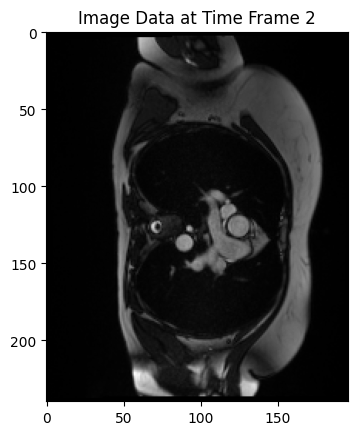

In [13]:
# Display the image data at time frame 2
image_frame1 = img_np[:, :, :, 1]  # Assuming the image data is stored in the 'image_np' variable
plt.imshow(image_frame1, cmap='gray')
plt.title('Image Data at Time Frame 2')
plt.show()

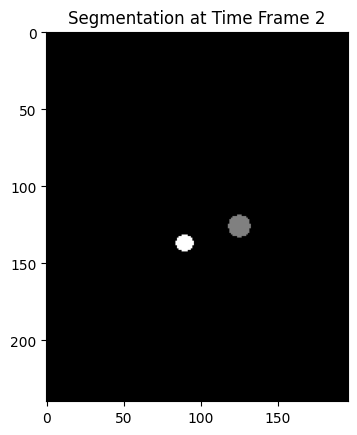

In [14]:
# Visualize the segmentation at time frame 2
seg_frame1 = seg_np[:, :, :, 99]  # Assuming the segmentation is stored in the 'seg_np' variable
plt.imshow(seg_frame1, cmap='gray')
plt.title('Segmentation at Time Frame 2')
plt.show()

In [15]:
im = sitk.ReadImage("segmentation_all.nii.gz")

# get voxel spacing (for 3-D image)
spacing = im.GetSpacing()
spacing_x = spacing[0]
spacing_y = spacing[1]
spacing_z = spacing[2]

# determine volume of a single voxel
voxel_volume = spacing_x * spacing_y * spacing_z

print(voxel_volume)

15.041667421658843


In [16]:
# Adjust the quality control criteria
#min_area_threshold = 0.5  # Adjust this threshold as needed
T = seg_np.shape[3]

def aorta_pass_quality_control(image, seg):
    """ Quality control for aortic segmentation """
    for l_name, l in [('AAo', 1), ('DAo', 2)]:
        # Criterion 1: the aorta does not disappear at some point.
        T = seg.shape[3]
        for t in range(T):
            seg_t = seg[:, :, :, t]
            area = np.sum(seg_t == l)
            if area == 0:
                print('The area of {0} is 0 at time frame {1}.'.format(l_name, t))
                return False

        # Criterion 2: no strong image noise, which affects the segmentation accuracy.
        image_ED = image[:, :, :, 0]
        seg_ED = seg[:, :, :, 0]
        mean_intensity_ED = image_ED[seg_ED == l].mean()
        ratio_thres = 3
        for t in range(T):
            image_t = image[:, :, :, t]
            seg_t = seg[:, :, :, t]
            max_intensity_t = np.max(image_t[seg_t == l])
            ratio = max_intensity_t / mean_intensity_ED
            if ratio >= ratio_thres:
                print('The image becomes very noisy at time frame {0}.'.format(t))
                return False

        # Criterion 3: no fragmented segmentation
        pixel_thres = 10
        for t in range(T):
            seg_t = seg[:, :, :, t]
            cc, n_cc = skimage.measure.label(seg_t == l, background=8, return_num=True)
            count_cc = 0
            for i in range(1, n_cc + 1):
                binary_cc = (cc == i)
                if np.sum(binary_cc) > pixel_thres:
                    # If this connected component has more than certain pixels, count it.
                    count_cc += 1
            if count_cc >= 2:
                print('The segmentation has at least two connected components with more than {0} pixels '
                      'at time frame {1}.'.format(pixel_thres, t))
                return False

        # Criterion 4: no abrupt change of area
        A = np.sum(seg == l, axis=(0, 1, 2))
        for t in range(T):
            ratio = A[t] / float(A[t-1])
            if ratio >= 2 or ratio <= 0.5:
                print('There is abrupt change of area at time frame {0}.'.format(t))
                return False
    return True

Explaination of Quality check case 1
```python
for l_name, l in [('AAo', 1), ('DAo', 2)]:
```
This line sets up a loop that iterates over a list of tuples containing the names and labels of two regions of interest: 'AAo' with a label of 1 and 'DAo' with a label of 2. During each iteration, the name is assigned to `l_name` and the label to `l`.

```python
    T = seg.shape[3]
```
This line calculates the number of time frames in the `seg` array. `seg` is assumed to be a 4-dimensional array, and `seg.shape[3]` retrieves the size of the fourth dimension, representing time.

```python
    for t in range(T):
```
This line sets up another loop that iterates over the range of time frames, starting from 0 and ending at `T-1`.

```python
        seg_t = seg[:, :, :, t]
```
This line selects the 3D slice of `seg` corresponding to the current time frame `t` using array indexing. The `seg_t` variable will represent the segmented image at that specific time frame.

```python
        area = np.sum(seg_t == l)
```
This line calculates the area of the region labeled as `l` in the `seg_t` image. It does so by comparing each element of `seg_t` to `l` and summing up the occurrences where the comparison is true. The result is stored in the `area` variable.

```python
        if area == 0:
            print('The area of {0} is 0 at time frame {1}.'.format(l_name, t))
            return False
```
This conditional statement checks if the area of the region labeled as `l` is zero for the current time frame `t`. If the area is indeed zero, it means that the aorta has disappeared or is not present in the segmentation. In that case, it prints a message indicating the region name and the time frame where it occurs, and then returns `False` to indicate that the quality control check has failed.

The code you provided seems to be a quality control check for aortic segmentation, ensuring that the aorta is not missing in any time frame. If the aorta is missing in any time frame, the code will print a message and return `False`.

Explaination of Quality check case 2
```python
# Criterion 2: no strong image noise, which affects the segmentation accuracy.
image_ED = image[:, :, :, 0]
seg_ED = seg[:, :, :, 0]
mean_intensity_ED = image_ED[seg_ED == l].mean()
ratio_thres = 3
```
These lines initialize some variables and perform calculations related to image intensity and noise. 

- `image_ED` selects the first time frame (index 0) from the 4-dimensional `image` array, resulting in a 3-dimensional image array.
- `seg_ED` selects the first time frame (index 0) from the 4-dimensional `seg` array, resulting in a 3-dimensional segmentation array.
- `mean_intensity_ED` calculates the mean intensity of the pixels in `image_ED` where the corresponding pixel in `seg_ED` is equal to the label `l`.

The `ratio_thres` variable is set to 3, representing a threshold for the intensity ratio.

```python
for t in range(T):
    image_t = image[:, :, :, t]
    seg_t = seg[:, :, :, t]
    max_intensity_t = np.max(image_t[seg_t == l])
    ratio = max_intensity_t / mean_intensity_ED
    if ratio >= ratio_thres:
        print('The image becomes very noisy at time frame {0}.'.format(t))
        return False
```
These lines set up a loop that iterates over the range of time frames.

Within the loop:
- `image_t` and `seg_t` select the 3-dimensional image and segmentation arrays for the current time frame `t`.
- `max_intensity_t` calculates the maximum intensity value within `image_t` where the corresponding pixel in `seg_t` is equal to the label `l`.
- `ratio` calculates the ratio of `max_intensity_t` to `mean_intensity_ED`, representing the relative intensity compared to the mean intensity of the first time frame.
- The conditional statement checks if `ratio` is greater than or equal to the `ratio_thres` threshold. If it is, it means that the image at time frame `t` is very noisy compared to the first time frame. In that case, it prints a message indicating the time frame and returns `False` to indicate that the quality control check has failed.

Overall, this part of the code is responsible for checking the presence of strong image noise that might affect the accuracy of the segmentation. If the intensity ratio between a specific time frame and the first time frame exceeds a threshold, it prints a message and returns `False`.

Explaination of Quality check case 3

```python
# Criterion 3: no fragmented segmentation
pixel_thres = 10
```
This line sets the threshold value for the minimum number of pixels required for a connected component to be considered significant. In this case, `pixel_thres` is set to 10.

```python
for t in range(T):
    seg_t = seg[:, :, :, t]
    cc, n_cc = skimage.measure.label(seg_t == l, background=8, return_num=True)
    count_cc = 0
    for i in range(1, n_cc + 1):
        binary_cc = (cc == i)
        if np.sum(binary_cc) > pixel_thres:
            # If this connected component has more than certain pixels, count it.
            count_cc += 1
    if count_cc >= 2:
        print('The segmentation has at least two connected components with more than {0} pixels '
              'at time frame {1}.'.format(pixel_thres, t))
        return False
```
These lines set up a loop that iterates over the range of time frames.

Within the loop:
- `seg_t` selects the 3-dimensional segmentation array for the current time frame `t`.
- `cc, n_cc = skimage.measure.label(seg_t == l, background=8, return_num=True)` labels the connected components in `seg_t` that have the label `l`. It assigns unique labels to each connected component and returns the labeled array (`cc`) and the number of connected components (`n_cc`).
- `count_cc` is initialized to 0 and will be used to count the number of connected components that meet the size threshold.
- The inner loop iterates over the range from 1 to `n_cc + 1`, representing the unique labels of the connected components.
- For each connected component, `binary_cc = (cc == i)` creates a binary mask where `True` indicates the pixels belonging to the connected component with label `i`.
- The conditional statement `if np.sum(binary_cc) > pixel_thres` checks if the connected component has more pixels than the `pixel_thres` threshold.
- If a connected component meets the size threshold, `count_cc` is incremented by 1.
- After iterating over all connected components, the final conditional statement `if count_cc >= 2` checks if there are at least two connected components that meet the size threshold. If there are, it prints a message indicating the time frame and returns `False` to indicate that the quality control check has failed.

This code is responsible for checking the segmentation for fragmented regions, specifically aiming to ensure that there are no less significant connected components with fewer pixels than the specified threshold (`pixel_thres`). If there are at least two significant connected components in a time frame, it prints a message and returns `False`.

In [17]:
aorta_pass_quality_control(img_np, seg_np)

True

In [18]:
data_path = '.'
# data_list = sorted(os.listdir(data_path))
table = []
# processed_list = []
# for data in data_list:
data_dir = os.path.join(data_path)
    
image_name = os.path.join(data_dir, 'patient_3_1092403_CINE_segmented_Ao_dist_20150412115656_20.nii')
seg_name = os.path.join(data_dir, 'segmentation_all.nii.gz')

if os.path.exists(image_name) and os.path.exists(seg_name):
   # print('data')
    
    

    # Read image
    nim = nib.load(image_name)
    dx, dy = nim.header['pixdim'][1:3]
    area_per_pixel = dx * dy
    image = nim.get_fdata()

    # Read segmentation
    nim = nib.load(seg_name)
    seg = nim.get_fdata()

  #  image_data = image_nim.get_fdata()
   # seg_data = seg_nim.get_fdata()

   # try:
    #   nifti_image = nib.load(image_name)
     #  print("Image loaded successfully.")
   # except FileNotFoundError:
      # print("File not found.")
   # if not os.path.exists(image_name) and os.path.exists(seg_name):
   #  print("segmentation file does not exist")

    # if not aorta_pass_quality_control(image, seg):
        

    # Measure the maximal and minimal area for the ascending aorta and descending aorta
    val = {}
    for l_name, l in [('AAo', 1), ('DAo', 2)]:
        val[l_name] = {}
        A = np.sum(seg == l, axis=(0, 1, 2)) * area_per_pixel
        val[l_name]['max area'] = A.max()
        val[l_name]['min area'] = A.min()
       # val[l_name]['distensibility'] = (A.max() - A.min()) / (A.min() * central_pp.loc[int(data)]) * 1e3

    line = [val['AAo']['max area'], val['AAo']['min area'],
            val['DAo']['max area'], val['DAo']['min area']]
    table += [line]
    # processed_list += [data]

# Save the spreadsheet for the measures
df = pd.DataFrame(table, index=[0],
                  columns=['AAo max area (mm2)', 'AAo min area (mm2)',
                           'DAo max area (mm2)', 'DAo min area (mm2)'])
df.to_csv('test1.csv')

In [19]:
df = pd.read_csv("test1.csv")  ##patient2 is 1017621 ##patient3 is 1092403

##refer the sheet here https://nuigalwayie-my.sharepoint.com/:x:/r/personal/m_chopra1_nuigalway_ie/_layouts/15/doc2.aspx?sourcedoc=%7B0A793856-5482-47BD-ABB0-2010E5CE0F64%7D&file=Aortic_Distensibility_UKBB.xlsx&action=default&mobileredirect=true&DefaultItemOpen=1&ct=1686580435460&wdOrigin=OFFICECOM-WEB.START.EDGEWORTH&cid=09985107-fae3-4ef1-a049-d3b978a4079e&wdPreviousSessionSrc=HarmonyWeb&wdPreviousSession=abd14032-31ec-4610-ad8b-439099d3123b

df

,Unnamed: 0,AAo max area (mm2),AAo min area (mm2),DAo max area (mm2),DAo min area (mm2)
0,0,511.41671,406.125034,386.069477,250.694466
